# Installation

In [30]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [31]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [32]:
from pycaret.utils import version
version()

'3.3.2'

# 1. Importing Dataset

In [33]:
import pandas as pd
data = pd.read_csv('Projec_final.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Enviroment         300 non-null    object 
 1   Organism           300 non-null    object 
 2   Genome size (mbp)  300 non-null    float64
 3   Tra                300 non-null    int64  
 4   Par                300 non-null    int64  
 5   mobC               300 non-null    int64  
 6   psbA               300 non-null    int64  
 7   psbB               300 non-null    int64  
 8   psbD               300 non-null    int64  
 9   psbU               300 non-null    int64  
 10  cpcA duplicated    300 non-null    int64  
 11  Transposase        300 non-null    int64  
 12  ISA family         300 non-null    int64  
 13  ISKra family       300 non-null    int64  
 14  IS family          300 non-null    int64  
 15  Rpn                300 non-null    int64  
 16  DDE                300 non

In [34]:
data

,Enviroment,Organism,Genome size (mbp),Tra,Par,mobC,psbA,psbB,psbD,psbU,...,NF family,ISL family,Tn family,TnsD family,Mu family,ISH family,ISNCY family,ISAzo family,ISLre family,PD-(D/E)XK family
0,No symbiotic,Acaryochloris marina MBIC11017,8.4,1,0,1,0,0,0,1,...,1,1,1,0,0,0,0,1,0,0
1,No symbiotic,Aliterella atlantica CENA595,5.3,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,No symbiotic,Allocoleopsis franciscana PCC 7113,8.0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,No symbiotic,Amazonocrinis nigriterrae CENA67,8.3,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,No symbiotic,Anabaena cylindrica PCC 7122,7.1,0,0,1,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Symbiotic,Synechococcus sp.bin45,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,Symbiotic,Synechococcus sp.bin6,2.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,Symbiotic,Synechococcus sp.bin7,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,Symbiotic,Synechococcus sp.bin8,1.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Setting up Environment

In [35]:
from pycaret.classification import setup
# Binarizar a coluna "Genome size (mbp)"
data['Class'] = data['Genome size (mbp)'].apply(lambda x: 0 if x <= 5.1 else 1)

# Configurar o ambiente PyCaret
exp = setup(data, target='Class', session_id=123)

data.head()

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(300, 28)"
4,Transformed data shape,"(300, 28)"
5,Transformed train set shape,"(210, 28)"
6,Transformed test set shape,"(90, 28)"
7,Numeric features,25
8,Categorical features,2
9,Preprocess,True


,Enviroment,Organism,Genome size (mbp),Tra,Par,mobC,psbA,psbB,psbD,psbU,...,ISL family,Tn family,TnsD family,Mu family,ISH family,ISNCY family,ISAzo family,ISLre family,PD-(D/E)XK family,Class
0,No symbiotic,Acaryochloris marina MBIC11017,8.4,1,0,1,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
1,No symbiotic,Aliterella atlantica CENA595,5.3,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,No symbiotic,Allocoleopsis franciscana PCC 7113,8.0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,No symbiotic,Amazonocrinis nigriterrae CENA67,8.3,0,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,No symbiotic,Anabaena cylindrica PCC 7122,7.1,0,0,1,1,1,0,0,...,1,1,0,1,0,0,0,0,0,1


# 3. Compare Models

In [36]:
from pycaret.classification import compare_models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0900
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2190
lr,Logistic Regression,0.9905,0.9991,1.0000,0.9800,0.9895,0.9808,0.9817,0.8840
knn,K Neighbors Classifier,0.9667,0.9926,0.9778,0.9496,0.9625,0.9326,0.9345,0.0990
svm,SVM - Linear Kernel,0.9571,0.9963,0.9333,0.9718,0.9487,0.9121,0.9174,0.0900
ridge,Ridge Classifier,0.9524,0.9935,0.9333,0.9578,0.9430,0.9022,0.9056,0.0910
et,Extra Trees Classifier,0.8571,0.9778,0.7000,0.9597,0.7918,0.6939,0.7240,0.2140
rf,Random Forest Classifier,0.8143,1.0000,0.5667,1.0000,0.7016,0.5934,0.6550,0.2580
qda,Quadratic Discriminant Analysis,0.7286,0.8468,0.4333,0.8933,0.5670,0.4072,0.4704,0.1540
nb,Naive Bayes,0.6429,0.5917,0.2333,0.7431,0.3300,0.1976,0.2652,0.0930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

# 4. Create Model

In [37]:
from pycaret.classification import create_model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9524,1.0000,1.0000,0.9000,0.9474,0.9041,0.9083


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9048,1.0000,1.0000,0.8182,0.9000,0.8108,0.8257
8,0.9524,1.0000,1.0000,0.9000,0.9474,0.9041,0.9083


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,1.0000,0.5556,1.0000,0.7143,0.5882,0.6455
1,0.7619,1.0000,0.4444,1.0000,0.6154,0.4776,0.5601
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8095,1.0000,0.5556,1.0000,0.7143,0.5882,0.6455
4,0.9524,1.0000,0.8889,1.0000,0.9412,0.9014,0.9058
5,0.8571,1.0000,0.6667,1.0000,0.8000,0.6957,0.7303
6,0.7143,1.0000,0.3333,1.0000,0.5000,0.3636,0.4714
7,0.7619,1.0000,0.4444,1.0000,0.6154,0.4776,0.5601
8,0.7143,1.0000,0.3333,1.0000,0.5000,0.3636,0.4714


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# 8. Analyze Model

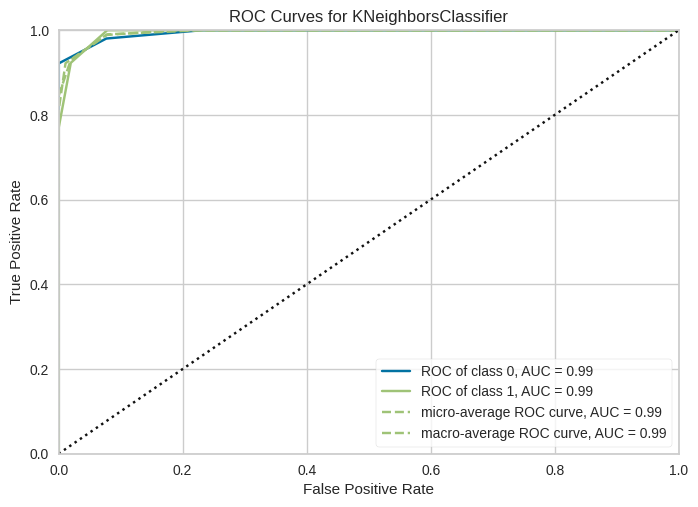

In [43]:
plot_model(knn)

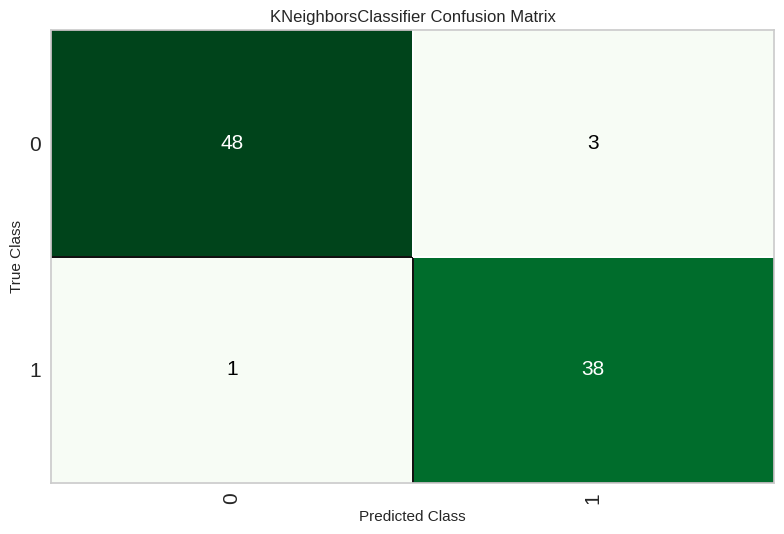

In [ ]:
plot_model(knn, plot = 'confusion_matrix')

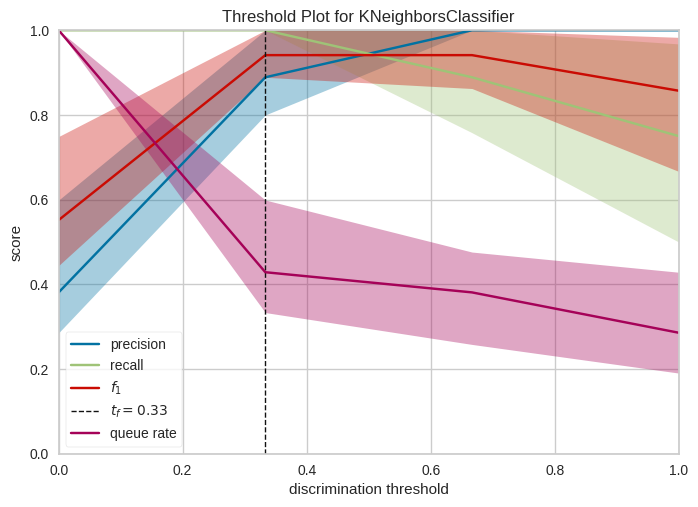

In [ ]:
plot_model(knn, plot = 'threshold')

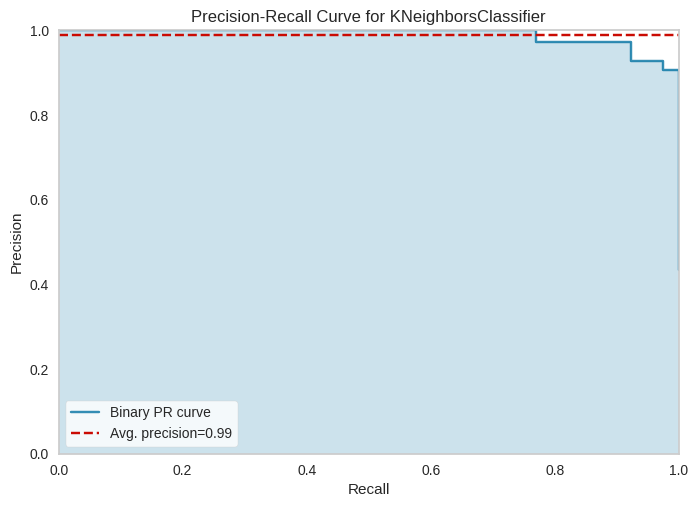

In [ ]:
plot_model(knn, plot = 'pr')

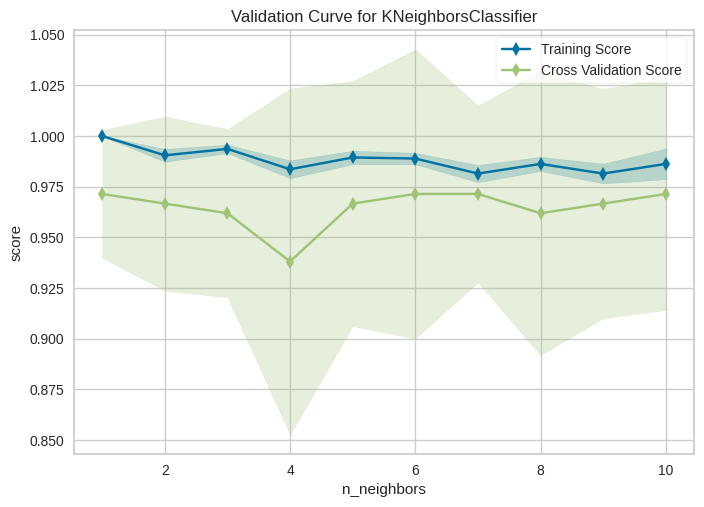

In [ ]:
plot_model(knn, plot = 'vc')

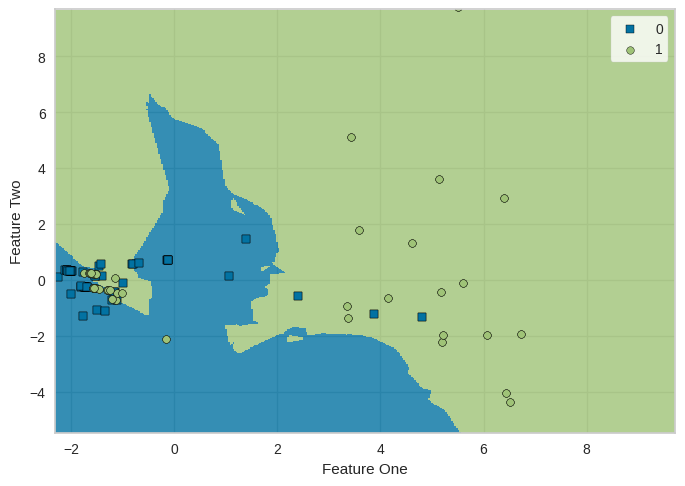

In [ ]:
plot_model(knn, plot = 'boundary')

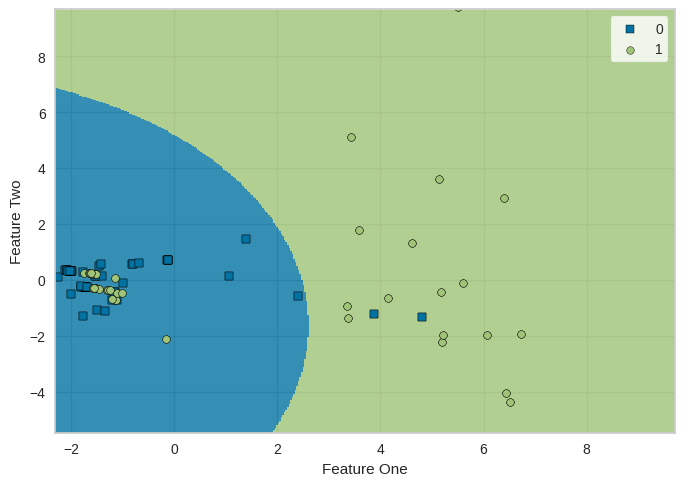

In [ ]:
plot_model(tuned_nb, plot = 'boundary')

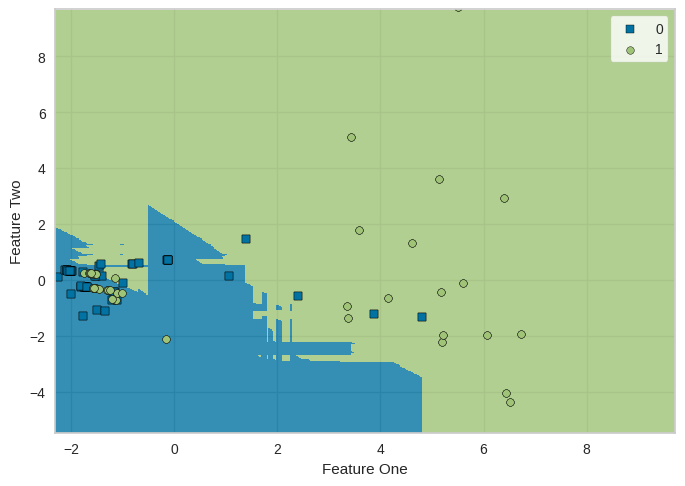

In [ ]:
plot_model(blender, plot = 'boundary')

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Learning Resources:

- PyCaret Classification Module : https://www.pycaret.org/classification
- Binary Classification Tutorial (Level Beginner) : https://pycaret.org/clf101/
- Binary Classification Tutorial (Level Intermediate) : https://pycaret.org/clf102/
- Kaggle Titanic Predictions (Video Tutorial) : https://www.youtube.com/watch?v=nqMM6rngNCA